# Project Forecasts & Predictions

Gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
In order to fight churn, Model Fitness has digitized a number of its customer profiles. My task is to analyze them and come up with a customer retention strategy.
1. Preprocessing the data
2. EDA 
3. Prediction models and testing
4. Clustring the data
5. Conclusion & Recommendations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
try:
    data=pd.read_csv('/datasets/gym_churn_us.csv')
except:
    data=pd.read_csv('gym_churn_us.csv')

In [3]:
data.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
data.columns= data.columns.str.lower() #lowering the letters 

In [5]:
data.shape

(4000, 14)

4000 observation is relatively small amount.
The data has 14 columns or 13 features from machine learning point of view.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

First of all there isn't any missing values. Also the values are numbers and not strings so the part of modeling and predictions will be done well.

# Step 2. Carry out exploratory data analysis (EDA)

In [7]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Describe method gives us some important insights:
1. Gender column has binaries values. The mean and std is almost equal so the distribution is normal and the data spilted equally between men and women.
2. Near_location column has binaries values. More users comes to the gym from nearby rather then from far. 
3. My hypothesis regarding partner, promo_friends and phone columns that they are not impacting on the churn rate and doesn't correlate with it. Most users provided a phone number so that why the data doesn't varies much. Half of the users comes from a signed company (partner column) and few of the users signed up through "bring a friend" plan.
4. Contract period has a mean of 4.6 month, median of 1 month and the std is 4.5. the distribution is skewed and my guess is that more users tend to take the shorter contracts.
5. Age column has a normal distribution. the average age is 29
6. Avg_additional_charges_total has a positive skewed curve. The values varies a lot and the mean is 147 dollars
7. Due to the fact that most users tend to sign up for short contracts also the month to end contract is low and that is why the median in month_to_end_contract column is 1 month
8. The lifetime distribution is positive skewed 
9. The average frequency columns has more or less normal distribution
10. Churn column has binaries values and according to the mean more people tend to stay rather to leave the gym.

In [8]:
data.duplicated().sum() #there is no duplicates values

0

In [9]:
data.groupby('churn').mean().reset_index()

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


When grouping by churn we can conclude that:
1. Users with short contracts tend to leave more often
2. The average age of users leaving the gym is lower then the one who stay (27 compare to 30)
3. The additional money spend is higher for the users who are staying (158 Dollars)
4. The average month_to_end_contract is only 1.6 for churn and 5.2 for not churn which indicates that users tend to leave towards the end of the contract
5. average liftime is much higher in users who are not leaving (4.7 compare to 1)
6. The average frequency for the current month is twice higher for the users who stayed

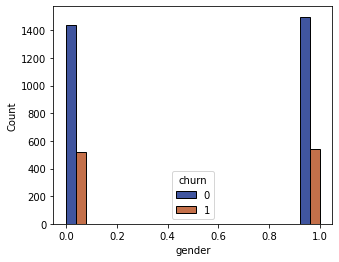

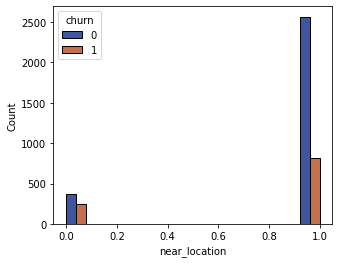

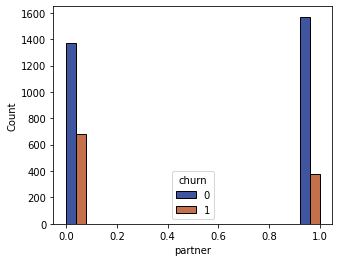

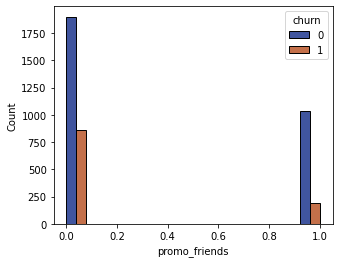

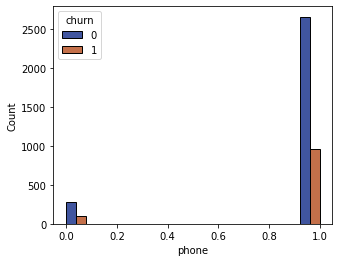

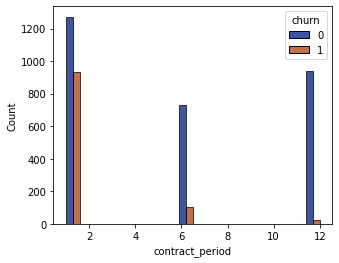

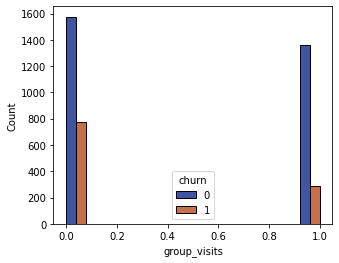

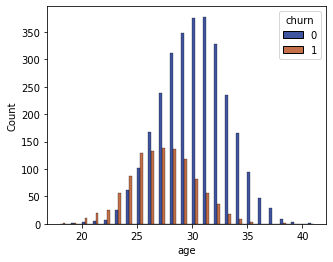

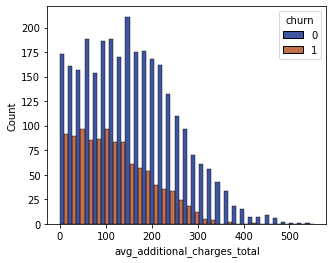

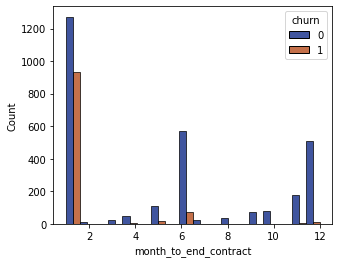

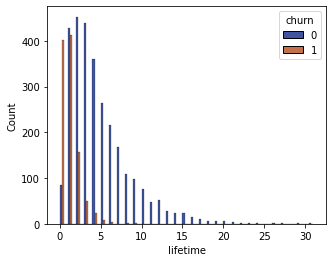

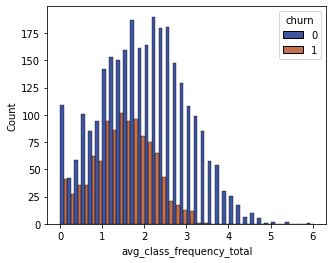

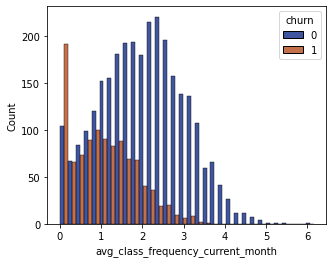

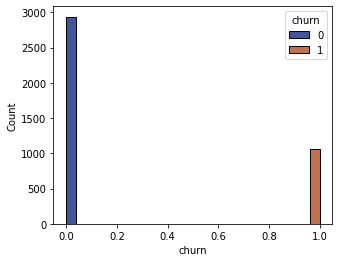

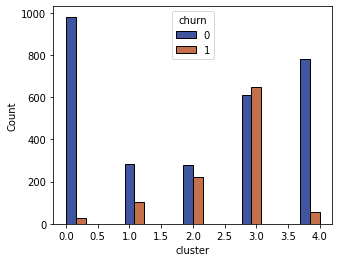

In [35]:
for i, col in enumerate(data.columns):
    plt.figure(i, figsize=(5,4))
    sns.histplot(
        data, x= col, hue='churn', palette= 'dark',multiple='dodge'
    )
    

In columns: age, life time, avg additional charge, avg frequency the churn users follows the same pattern as the non churn users. 
In contract period the churn users tends to be more in the shorter period

<AxesSubplot:>

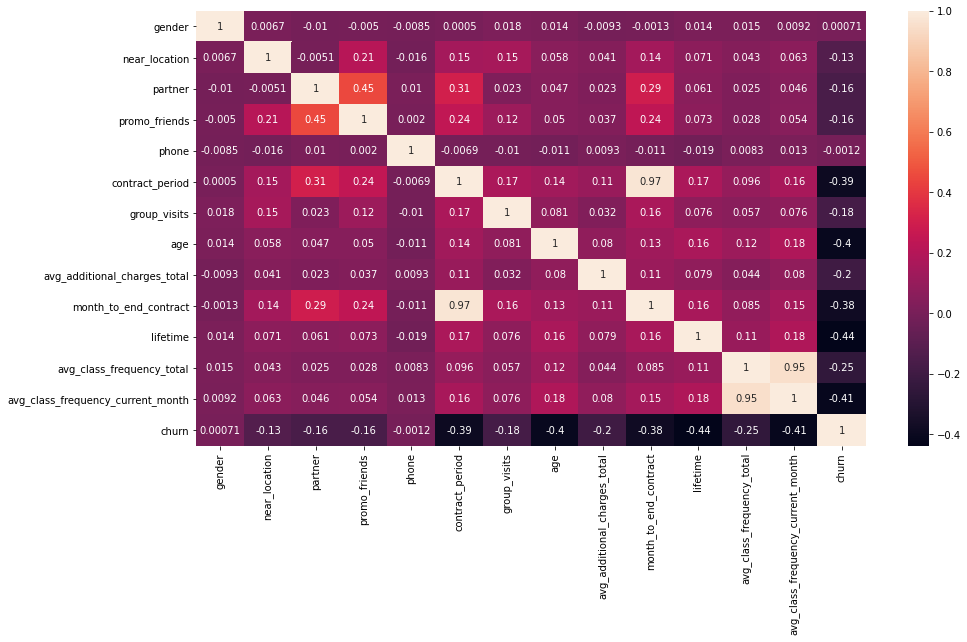

In [11]:
corr= data.corr()
plt.figure(figsize= (15,8))
sns.heatmap(corr, annot= True)

We can noticed that contract_period and month_to_end_contract correlation is high which is make sense.
average frequency of month and overall has high correlation of 0.95.
All other features doesn't preform high correlation at all

# Step 3. Build a model to predict user churn

In [12]:
X= data.drop('churn', axis=1)
y= data['churn'] # dividing the data to features and target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
lr_model = LogisticRegression(random_state=0)
# train the model

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)# train the scaler on the train set using the fit method
X_train_st =scaler.transform(X_train) # standardize the train set using the transform scaler method
X_test_st = scaler.transform(X_test)

In [16]:
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

In [17]:
lr_predictions = lr_model.predict(X_test_st)
lr_predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [18]:
lr_probabilities = lr_model.predict_proba(X_test_st)

In [19]:
lr_probabilities

array([[9.98389807e-01, 1.61019339e-03],
       [2.26997245e-02, 9.77300276e-01],
       [5.35484766e-01, 4.64515234e-01],
       ...,
       [8.67956658e-01, 1.32043342e-01],
       [9.99994981e-01, 5.01899641e-06],
       [9.99500115e-01, 4.99885356e-04]])

In [20]:
def score(y_test,predictions):
    acc= accuracy_score(y_test, predictions)
    prec= precision_score(y_test, predictions)
    recall= recall_score(y_test, predictions)
    f1= f1_score(y_test, predictions)
    print('Accuracy score is: {:.2f}'.format(acc))
    print('Precision score is: {:.2f}'.format(prec))
    print('Recall score is: {:.2f}'.format(recall))
    print('F1 score is: {:.2f}'.format(f1))

In [21]:
score(y_test, lr_predictions)

Accuracy score is: 0.92
Precision score is: 0.85
Recall score is: 0.83
F1 score is: 0.84


In [22]:
rf_model= RandomForestClassifier()

In [23]:
rf_model.fit(X_train_st, y_train)

RandomForestClassifier()

In [24]:
rf_predictions= rf_model.predict(X_test_st)

In [25]:
score(y_test, rf_predictions)

Accuracy score is: 0.92
Precision score is: 0.85
Recall score is: 0.83
F1 score is: 0.84


Logistics regression model preformed better then random forest model. It shows that the model is more accuracy in terms of true positives and overall probabilities

In [26]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters = 5, random_state= 0) # setting the number of clusters as 5
labels = km.fit_predict(X_sc)

In [27]:
linked = linkage(X_sc, method = 'ward') 


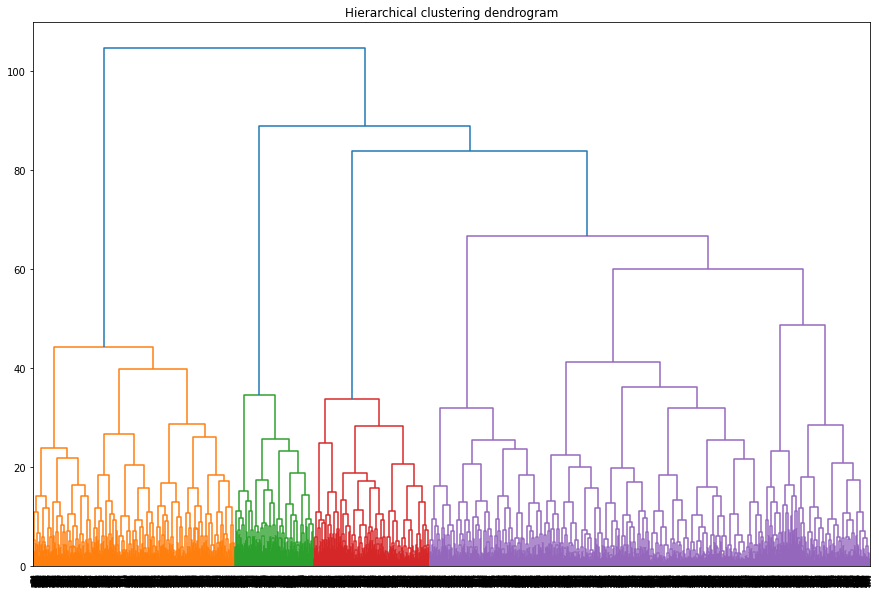

In [28]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering dendrogram')
plt.show()

In [29]:
data['cluster'] = labels

In [37]:
cluster= data.groupby('cluster').mean().reset_index()
cluster

,cluster,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Conclusion: the features that impact the clusters the most are the ones that the mean values are different from one cluster to another one:
1. contract_period
2. month_to_end_contract
3. avg_class_frequency_total
4. avg_class_frequency_current_month
5. avg_additional_charges_total
6. lifetime
7. churn

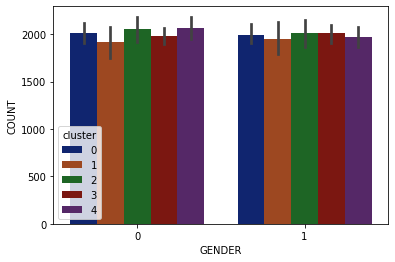

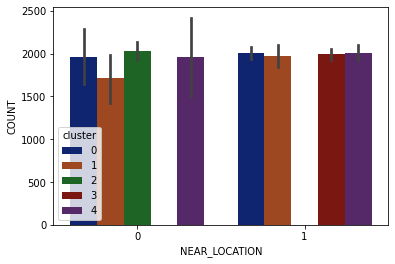

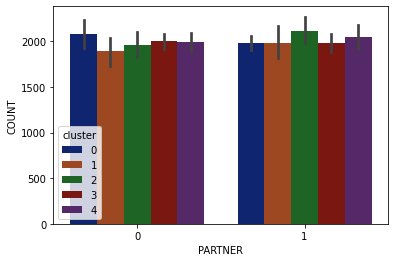

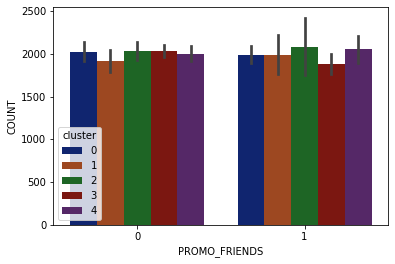

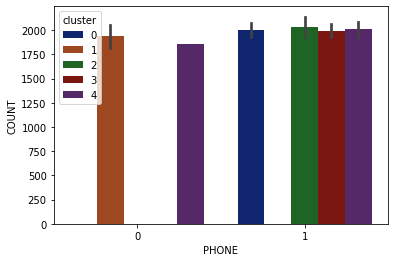

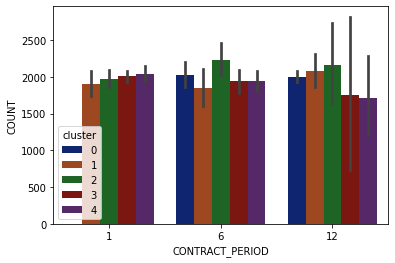

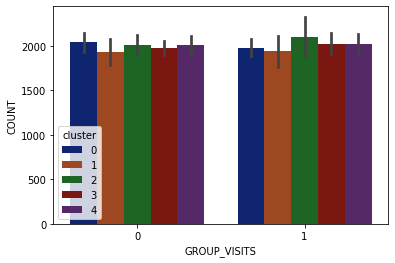

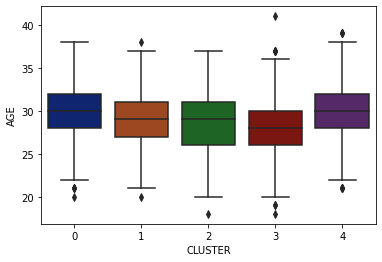

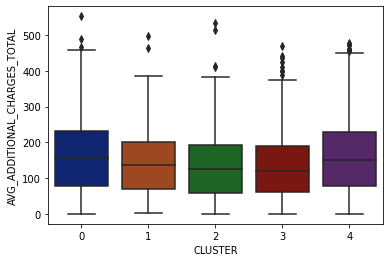

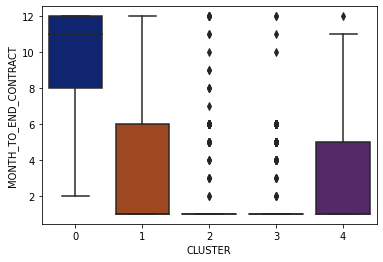

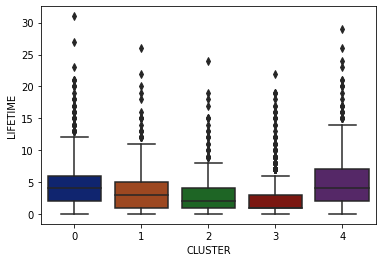

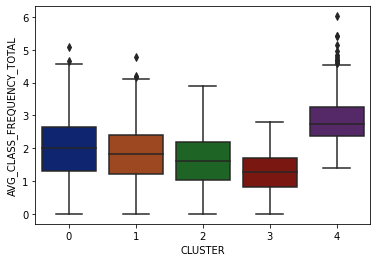

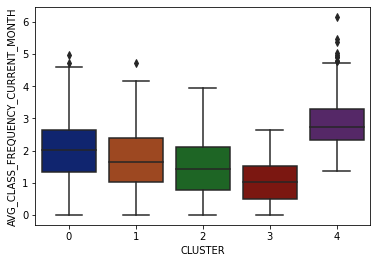

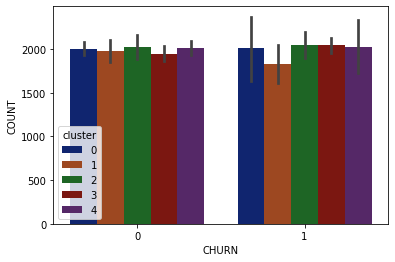

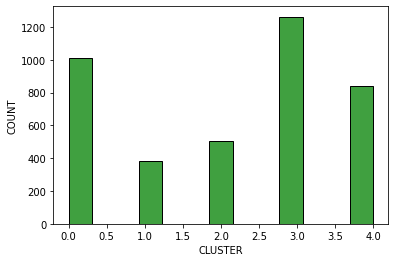

In [31]:
for i in data: 
    
    if i == 'cluster': #plotting for cluster
        plt.figure(figsize=(6,4))
        sns.histplot(data=data, x='cluster', color='green')
        plt.xlabel('CLUSTER')
        plt.ylabel('COUNT')
    elif data[i].nunique() > 2 and data[i].nunique() !=3: #plotting for continous without contract period
        plt.figure(figsize=(6,4))
        sns.boxplot(data=data, x='cluster',y=i, palette= 'dark')
        plt.xlabel('Cluster'.upper())
        plt.ylabel(i.upper())
    else:
        plt.figure(figsize=(6,4)) #plotting for discrete
        sns.barplot(data=data, x= i, y=data.index,hue='cluster', palette='dark')
        plt.xlabel(i.upper())
        plt.ylabel('COUNT')
        

In [32]:
churn= data.query('churn==1').groupby('cluster')['churn'].count().reset_index()
churn

,cluster,churn
0,0,28
1,1,103
2,2,224
3,3,649
4,4,57


In [33]:
users=data.groupby('cluster')['churn'].count().reset_index()
users

,cluster,churn
0,0,1010
1,1,385
2,2,505
3,3,1262
4,4,838


Text(0, 0.5, 'Churn %')

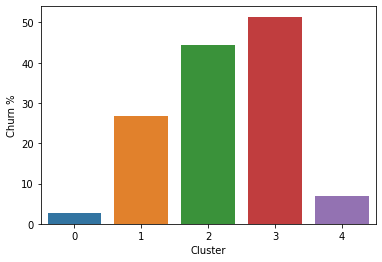

In [45]:
churn_rate= (churn['churn'] / users['churn'] * 100
            ).reset_index().sort_values(
    by='churn', ascending=False
)
sns.barplot(data=churn_rate, x=churn_rate.index, y='churn')
plt.xlabel('Cluster')
plt.ylabel('Churn %')

Cluster 3 has 51% churn rate while cluster 0 has only 2%

<div class="alert alert-success">
<b>Reviewer's comment</b>

Clusters were identified and studied successfully! It's nice that you used `random_state` to ensure reproducibility of your research

</div>

# Step 5. Come up with conclusions and basic recommendations on working with customers

In order to gain higher retension rate we need to pay attension to cluster 2 and 3. Both of them have high churn rate. The features that can indicates leaving the gym the following month are:
1. Contract period- the shorter contract the higher chance of churn.
2. Users which are spending more money on others gym services likely to stay and not leave.
3. Users that comes less then 2 times per week are not showing stability and having high chance of leaving.
4. After 4 month since the first time user came to the gym there is a good chance he will stay and not leave according to lifetime column.